#### 1-1

In [5]:
print('Welcome to the GPA calculator')
print('Please enter all your letter grades, one per line.')
print('Enter a blank line to designate the end.')

points = {
    'A+':4.0,
    'A': 4.0,
    'A-': 3.67,
    'B+': 3.33,
    'B': 3.0,
    'B-': 2.67,
    'C+':2.33,
    'C': 2.0,
    'D+': 1.33,
    'D': 1.0,
    'F': 0.0
}
num_courses = 0
total_points = 0
done =False
while not done: # while not True break
    grade = input()
    if grade == "":
        done = True
    elif grade not in points:
        print("Unknow grade '{0}' being ignored".format(grade))
    else:
        num_courses += 1
        total_points += points[grade]
        
if num_courses > 0:
    print('Your GPA is {0:.3}'.format(total_points / num_courses))  # 位置参数 对齐填充方式 无 长度为3的精度

Welcome to the GPA calculator
Please enter all your letter grades, one per line.
Enter a blank line to designate the end.
a
Unknow grade 'a' being ignored
A
B
C
F

Your GPA is 2.25


1.8 生成器

In [8]:
def factors(n):
    results = []
    for k in range(1, n+1):
        if n%k == 0:
            results.append(k)
    return results

def factors(n):
    for k in range(1, n+1):
        if n%k == 0:
            yield k

In [10]:
for i in factors(100):
    print(i)

1
2
4
5
10
20
25
50
100


In [13]:
def factors(n):
    k = 1
    while k * k < n:
        if n % k == 0:
            yield k
            yield n//k
        k += 1
        
    if k * k == n:
        yield k
        
for i in factors(100):
    print(i)
    print('-' * 5)

1
-----
100
-----
2
-----
50
-----
4
-----
25
-----
5
-----
20
-----
10
-----


#### 2-1 2-2

In [148]:
class CreditCard:
    """A consumer credit card"""
    
    def __init__(self, customer, bank, acnt, limit, balance=0):  # R-2.7 
        """Create a new credit card instance
        
        The initial balance is zero
        
        customer the name of the customer
        bank        the name of the bank
        acnt         the acount identifier
        limit         credit limit
        """
        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = balance
        
    def get_customer(self):
        """Return name of the customer"""
        return self._customer
    
    def get_bank(self):
        """Return the bank's name."""
        return self._bank
    
    def get_account(self):
        """Return the card identifying number (typically stored as s string)."""
        return self._account
    
    def get_limit(self):
        """Return current credit limit"""
        return self._limit
    
    def get_balance(self):
        """Return current balance"""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card. assuming sufficient credit limit
        
        Return True if charge was processed;False if charge was denied
        """
        # R-2.5
        if not isinstance(price, int) or isinstance(price, float):
            raise ValueError
        # R-2.6
        if price < 0:  
            raise ValueError
        if price + self._balance > self._limit:
            return False
        else:
            self._balance += price
            return True
        
    def make_payment(self, amount):
        # R-2.5
        if not isinstance(amount, int) or isinstance(amount, float):
            raise ValueError
        """Process customer payment that reduces balance"""
        self._balance  -= amount

In [2]:
cc = CreditCard('John Doe', '1st Bank', '5391 0375 9387 5309', 1000)

#### 2-3

In [150]:
if __name__ == '__main__':
    wallet = []
    wallet.append(CreditCard('john', '1st', '5391-0100', 2500))
    wallet.append(CreditCard('john', '2st', '5391-0200', 3500))
    wallet.append(CreditCard('john', '3st', '5391-0300', 4500))
    #R-2.8
    for val in range(1000, 2000, 500):
        wc = wallet[0].charge(val)
        if not wc:
            raise ValueError('0 is limited')

        wc = wallet[1].charge(2 * val)
        if not wc:
            raise ValueError('1 is limited')

        wc = wallet[2].charge(3 * val)
        if not wc:
            raise ValueError('2 is limited')


'''
    for c in range(3):
        print('Customer =', wallet[c].get_customer())
        print('Bank =', wallet[c].get_bank())
        print('Account =', wallet[c].get_account())
        print('Limit =', wallet[c].get_limit())
        print('Balance =', wallet[c].get_balance())
        
        while wallet[c].get_balance() > 100:
            wallet[c].make_payment(100)
            print('New balance =', wallet[c].get_balance())
        print('-' * 25)
'''        

ValueError: 1 is limited

In [6]:
class SequenceIterator:
    
    def __init__(self, sequence):
        self._seq = sequence
        self._k = -1
        
    def __next__(self):
        self._k += 1
        if self._k < len(self._seq):
            return (self._seq[self._k])
        else:
            raise StopIteration()
                
    def __iter__(self):
        return self

In [14]:
sl = SequenceIterator(list('abcdg'))

In [17]:
next(sl)

'c'

#code section
#2-6

In [ ]:
class Range:
    """A class that mimic's the built-in range class"""
    
    def __init__(self, start, stop=None, step=1):
        if step == 0:
            raise ValueError('step cannot be 0')
            
        if stop is None:
            start, stop = 0, start
            
        # calculate the effective length once
        self._length = max(0, (stop - start + step -1) // step)
        self._start = start
        self._step = step
        
    def __len__(self):
        return self._length
    
    def __getitem__(self, k):  # self[k]
        if k < 0:
            k += len(self)
            
        if not 0 <= k < self._length:
            raise IndexError('index out of range')
            
        return self._start + k * self._step

#code section
#2-7

In [21]:
class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""
    
    def __init__(self, customer, bank, acnt, limit, apr):
        """Create a new predatory credit card instance
        
        The initial balance is zero
        """
        super().__init__(customer, bank, acnt, limit)
        self._apr = apr
        
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit
        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied
        """
        success = super().charge(price)  # call inherited method
        if not success:
            self._balance += 5
        return success
    
    def process_month(self):
        if self._balance > 0:  # self._balance !!!
            monthly_factor = pow(1 + self._apr, 1/12)
            self._balance *= monthly_factor

code section 2-8

In [161]:
import sys

class Progression:
    """Iterator producing a generic progression.
    
    Default iterator produces the whole numbers 0,1,2
    """
    
    def __init__(self, start=0):
        """Initialize current to the first value of the progression."""
        self._current = start
        self._count = []
        
    def _advance(self):
        """Update self._current to a new value
        
        This should be override by a subclass to customize progression
        By convention. if current is set to None, this designates the end of a finite progression
        """
        self._current += 1
        
    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:
            raise StopIteration
        else:
            answer = self._current
            self._advance()
            self._count.append(answer)
            if answer > 2 ** 63:
                print(len(self._count))
                sys.exit()
            return answer
        
    def __iter__(self):
        """By convention, an itertor must return itself as en iterator"""
        return self
    
    def print_progression(self, n):
        """Print next n values of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))    

In [23]:
p = Progression(10)
next(p)

10

In [24]:
next(p)

11

code section 2-9

In [25]:
class ArithmeticProgression(Progression):
    def __init__(self, increment=1, start=0):
        super().__init__(start)  # initialize base class
        self._increment = increment
        
    def _advance(self):  # override inherited version
        """Update current value by adding the fixed increment"""
        self._current += self._increment

In [28]:
ap = ArithmeticProgression(3, 2)
next(ap)

2

In [30]:
next(ap), next(ap)

(8, 11)

code section 2-10  GeometricProgression ....

code section 2-11 Fibonacci

In [49]:
class FibonacciProgression(Progression):
    def __init__(self, start=0, second=1):
        super().__init__(start)
        self._prev = second - start
        
    def _advance(self):
        self._prev, self_current = self._current, self._prev + self._current
        

In [50]:
fp = FibonacciProgression(4,6)
next(fp), next(fp), next(fp)

(4, 4, 4)

In [52]:
class FibonacciProgression(Progression):
    def __init__(self, start=0, second=1):
        super().__init__(start)
        self._prev = second - start

    def _advance(self):
        self._prev, self._current = self._current, self._prev + self._current

In [153]:
fp = FibonacciProgression(2,2)

In [156]:
fp.print_progression(8)

3194 5168 8362 13530 21892 35422 57314 92736


code section 2-14

In [55]:
from abc import ABCMeta, abstractmethod

class Sequence(metaclass=ABCMeta):
    """Our own version of collections, Sequence abstract base class."""
    
    @abstractmethod
    def __len__(self):
        """Return the element at index j of the sequence."""
        
    @abstractmethod
    def __getitem__(self, j):
        """Return the element at index j of the sequence."""
        
    def __contains__(self, val):  # val in self?
        for j in range(len(self)):
            if self[j] == val:
                return True
        return False
    #R-2.22
    def __eq__(self, list1, list2):
        if [i for i in list1] == [i for i in list2]:
            return True
        else:
            return False
    #R-2.23
    def __lt__(self, dict1, dict2):
        pass
    
    def index(self, val):
        for j in range(len(self)):
            if self[j] == val:
                return j
        raise ValueError('Value not in sequence')
        
    def count(self, val):
        k = 0
        for j in range(len(self)):
            if self[j] == val:
                k += 1
        return k

#2-6

In [77]:
warm = list('abcdg')
pla = list(warm)

In [78]:
warm, pla

(['a', 'b', 'c', 'd', 'g'], ['a', 'b', 'c', 'd', 'g'])

In [79]:
pla[0] = 1
warm, pla

(['a', 'b', 'c', 'd', 'g'], [1, 'b', 'c', 'd', 'g'])

In [80]:
id(pla[1]), id(warm[1])

(1713283252944, 1713283252944)

In [81]:
id(pla[0]), id(warm[0])

(140716794995344, 1713283254624)

In [71]:
import copy

In [72]:
pla = copy.deepcopy(warm)

In [73]:
id(pla[1]), id(warm[1])

(1713283252944, 1713283252944)

In [74]:
pla[0] = 1
warm, pla

(['a', 'b', 'c', 'd', 'g'], [1, 'b', 'c', 'd', 'g'])

In [75]:
id(pla[1]), id(warm[1])

(1713283252944, 1713283252944)

In [76]:
id(pla[0]), id(warm[0])

(140716794995344, 1713283254624)

##### R-2.4 & R-2.5

In [130]:
class Flower:
    def __init__(self, flower_name='rose', flower_number='1', flower_price='1.22'):
        self.flower_name = flower_name
        self.flower_number = flower_number
        self.flower_price = flower_price
        
    def __getitem__(self, param):
        if param == 'name':
            return self.flower_name
        elif param == 'number':
            return self.flower_number
        elif param == 'price':
            return self.flower_price
        else:
            raise KeyError
        
    def __setitem__(self, key, value):
        if key == 'name' and value.isalpha():
            self.flower_name = value
        elif key == 'number' and isinstance(value, int):
            self.flower_number = value
        elif key == 'price' and isinstance(value, float):
            self.flower_price = value
        else:
            raise KeyError

In [131]:
er1 = Flower()

In [132]:
er1['name'], er1['number'], er1['price']

('rose', '1', '1.22')

In [133]:
er1['price'] = 'ssss'
er1['price']

KeyError: 

In [134]:
er1['name'] = '3'

KeyError: 

In [136]:
er1['number'] = 'st2'

KeyError: 

R-2.19

In [ ]:
import sys

class Progression:
    """Iterator producing a generic progression.
    
    Default iterator produces the whole numbers 0,1,2
    """
    
    def __init__(self, start=0):
        """Initialize current to the first value of the progression."""
        self._current = start
        self._count = []
        
    def _advance(self):
        """Update self._current to a new value
        
        This should be override by a subclass to customize progression
        By convention. if current is set to None, this designates the end of a finite progression
        """
        self._current += 128
        
    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:
            raise StopIteration
        else:
            answer = self._current
            self._advance()
            self._count.append(answer)
            if answer > 2 ** 32:
                print(len(self._count))
                sys.exit()
            return answer
        
    def __iter__(self):
        """By convention, an itertor must return itself as en iterator"""
        return self
    
    def print_progression(self, n):
        """Print next n values of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))    

In [ ]:
pp = Progression()
pp.print_progression(1000000000000000000000000)

In [ ]:
出现MemoryError
2 ** 31 调用800万次

## 创新

C-2.26

In [1]:
class ReversedSequenceIterator:
    
    def __init__(self, sequence):
        self._seq = sequence
        self._k = 0
        
    def __next__(self):
        self._k -= 1
        if self._k < len(self._seq):
            return (self._seq[self._k])
        else:
            raise StopIteration()
                
    def __iter__(self):
        return self

In [2]:
rsi = ReversedSequenceIterator(list('abddd'))

In [6]:
next(rsi)

'b'

## 项目

P-2.33

In [12]:
dxs = '2*x+3*y+4*z+6'

def ds(dxs):
    dxslist = dxs.split('+')
    print('+'.join([i[0] for i in dxslist]))
    
ds(dxs)    

2+3+4+6


P-2.34

In [37]:
import os, re
import matplotlib.pyplot as plt

from collections import Counter
os.listdir()

['.ipynb_checkpoints', 'ex1.ipynb', 'plotClassifierRegions.py']

In [22]:
file_content = open('plotClassifierRegions.py', 'r', encoding='utf8')

In [23]:
f_read = file_content.read()

In [30]:
pat = re.compile(r"[^a-zA-Z]")

In [32]:
charsub = re.sub(pat,'',f_read)

In [35]:
cc = Counter(charsub)

In [39]:
cc10 = cc.most_common(10)

In [40]:
weight = [i[0] for i in cc10]

In [42]:
height = [i[1] for i in cc10]

<BarContainer object of 10 artists>

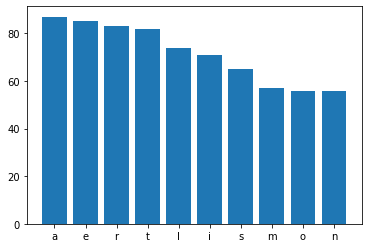

In [44]:
plt.bar(weight, height)

P-2.36&P-2.37

In [58]:
import random

class EcoSystem:
    def __init__(self, bear, fish, river):
        self.bear = bear
        self.fish = fish
        self.river = [self.bear * 5, self.fish * 3]
    
    def fight(self):
        for i in range(len(self.river)):
            if self.river[i] == self.river[i+1]:
                self.river.insert(random.randint(0,len(self.river)), self.river[i])
            elif self.river[i] != self.river[i+1]:
                del self.river[i]
                del self.river[i+1]
                self.river.append(self.bear)
        return self.river